<a href="https://colab.research.google.com/github/G0807/vendas-kaggle/blob/main/vendasKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analize de dados vendas arquivo do Kaggle

Texto desafio gerado por IA

Olá! Sou a Ana, diretora de marketing da **"Moda Sustentável Online"**, uma e-commerce de roupas e acessórios ecológicos.

Recebemos um volume crescente de dados de vendas e, para ser sincera, estamos um pouco perdidos em como tirar o máximo proveito deles. Tenho esse arquivo com informações sobre as vendas, contendo `namesale_id`, `product_id`, `product`, price_y`, `quantity`, `price_x`, `created_at`, `updated_at` e `email`.

Precisamos de uma análise aprofundada para entender melhor o comportamento dos nossos clientes e otimizar nossas estratégias.

**Em linhas gerais, gostaríamos de saber:**

* **Quais são os produtos mais vendidos** e qual o **ticket médio** por produto?
* Existe algum **padrão de compra** em relação a quantidade e preço dos produtos?
* Conseguimos identificar **clientes mais engajados** (que compram com mais frequência ou gastam mais)?
* Há alguma **tendência de vendas** ao longo do tempo (dias da semana, meses)?

Nosso objetivo é usar essas informações para personalizar ofertas, melhorar a gestão de estoque e, claro, aumentar nossas vendas. Você pode nos ajudar com isso?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

vendas_df = pd.read_csv('/content/tudo.csv')
display(vendas_df)

,name,sale_id,product_id,product,price_y,quantity,price_x,created_at,updated_at,email
0,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,3.89990,2433.800,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
1,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,4.00000,1196.580,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
2,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,1.38452,1975.000,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
3,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,2.22500,119.526,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
4,Mason Howell,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,296,Lang Club,866.694,2.89000,2386.940,1997-09-17 21:50:14+00:00,2007-02-15 19:34:06+00:00,jessica.cole@example.net
...,...,...,...,...,...,...,...,...,...,...
44495,Ashlynn Jaskolski,3d9d0fd1-0406-3ee8-84ee-5a29be946b2b,235,Roselyn Road,3366.300,3.00000,3455.700,2019-12-10 02:43:34+00:00,1981-04-24 06:20:37+00:00,leffler.mafalda@example.net
44496,Miss Krista Kuhic,c9b46a89-e252-3e69-9b4c-d2a1f7bd86e8,235,Roselyn Road,3366.300,2.45209,1896.100,1981-03-17 13:05:45+00:00,1986-06-24 12:35:27+00:00,leland.vonrueden@example.net
44497,Miss Krista Kuhic,c9b46a89-e252-3e69-9b4c-d2a1f7bd86e8,235,Roselyn Road,3366.300,3.08220,3997.900,1981-03-17 13:05:45+00:00,1986-06-24 12:35:27+00:00,leland.vonrueden@example.net
44498,Miss Krista Kuhic,c9b46a89-e252-3e69-9b4c-d2a1f7bd86e8,235,Roselyn Road,3366.300,1.00000,2695.000,1981-03-17 13:05:45+00:00,1986-06-24 12:35:27+00:00,leland.vonrueden@example.net


Tratando o dataframe.

In [ ]:
print(vendas_df.dtypes)

name           object
sale_id        object
product_id      int64
product        object
price_y       float64
quantity      float64
price_x       float64
created_at     object
updated_at     object
email          object
dtype: object


In [ ]:
#vendas_df['quantity'] = vendas_df['quantity'].astype(int)
#print(vendas_df.dtypes)

Os itens crested_at e update_at precisa ser tratado, tipo datetime.

In [ ]:
vendas_df['created_at'] = pd.to_datetime(vendas_df['created_at'])
vendas_df['updated_at'] = pd.to_datetime(vendas_df['updated_at'])
print(vendas_df.dtypes)

name                       object
sale_id                    object
product_id                  int64
product                    object
price_y                   float64
quantity                  float64
price_x                   float64
created_at    datetime64[ns, UTC]
updated_at    datetime64[ns, UTC]
email                      object
dtype: object


Veficando se há NaN.

In [ ]:
vendas_df.isnull().sum()

,0
name,0
sale_id,0
product_id,0
product,0
price_y,0
quantity,0
price_x,0
created_at,0
updated_at,0
email,0


Verificando se há linhas repetidas.3

In [ ]:
duplicadas = vendas_df.duplicated()
print(duplicadas.sum())

0


EDA, analize exploratoria.

In [ ]:
vendas_df.describe()

,product_id,price_y,quantity,price_x
count,44500.000000,44500.000000,44500.000000,44500.000000
mean,300.387640,1897.930295,2.505359,1999.161519
std,57.734845,1144.833746,1.446676,1155.451744
min,201.000000,58.000000,0.000000,0.055818
25%,250.000000,902.364000,1.241923,994.173000
50%,300.000000,1754.000000,2.500000,2001.355000
75%,350.000000,2988.600000,3.779000,3001.707500
max,400.000000,3982.340000,5.000000,4000.000000


In [ ]:
vendas_df.shape

(44500, 10)

,price_x
product_id,
371,493558.85510
208,488999.38316
279,485298.79020
272,480334.64540
273,479509.35370


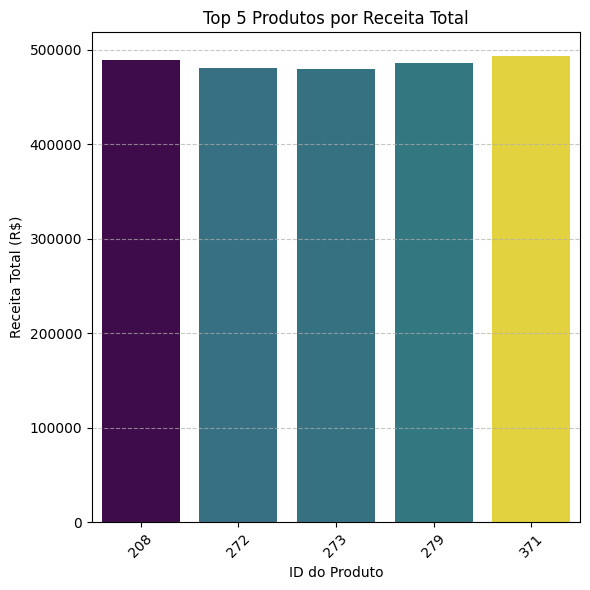

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
top_produtos = vendas_df[['product_id','price_x']].groupby('product_id').sum().sort_values(by='price_x', ascending=False).head(5)
display(top_produtos)

plt.figure(figsize=(6, 6))
sns.barplot(x=top_produtos.index, y=top_produtos['price_x'],hue=top_produtos.index, palette='viridis',legend=False)
plt.grid(axis='y', linestyle='--',alpha=0.7)
plt.title('Top 5 Produtos por Receita Total')
plt.xlabel('ID do Produto')
plt.ylabel('Receita Total (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:

# Pega a lista dos IDs dos top 5 produtos
top_5_product_ids = top_produtos.index.tolist()

# 2. Filtrar o DataFrame apenas para os Top 5 Produtos
df_top_5 = vendas_df[vendas_df['product_id'].isin(top_5_product_ids)]


ocorrencias_top_5 = df_top_5['product_id'].value_counts().loc[top_5_product_ids] # Garante a ordem dos top 5

#  DataFrame para o Ticket Médio
ticket_medio_top_5 = pd.DataFrame({
    'Receita Total': top_produtos['price_x'],
    'Numero de Ocorrencias': ocorrencias_top_5
})

# Ticket Médio
ticket_medio_top_5['Ticket Medio por Ocorrencia'] = ticket_medio_top_5['Receita Total'] / ticket_medio_top_5['Numero de Ocorrencias']

# Exibir os resultados
print("\nTop 5 Produtos por Receita e Seus Tickets Médios por Ocorrência:")
display(ticket_medio_top_5)
total_vendas_por_pedido = vendas_df.groupby('sale_id')['price_x'].sum()
ticket_medio_geral_pedido = total_vendas_por_pedido.mean()
print(f"\nTicket Médio Geral por Pedido (sale_id): R$ {ticket_medio_geral_pedido:.2f}")


Top 5 Produtos por Receita e Seus Tickets Médios por Ocorrência:


,Receita Total,Numero de Ocorrencias,Ticket Medio por Ocorrencia
product_id,,,
371,493558.85510,222,2223.238086
208,488999.38316,223,2192.822346
279,485298.79020,223,2176.227759
272,480334.64540,223,2153.967020
273,479509.35370,223,2150.266160



Ticket Médio Geral por Pedido (sale_id): R$ 8896.27


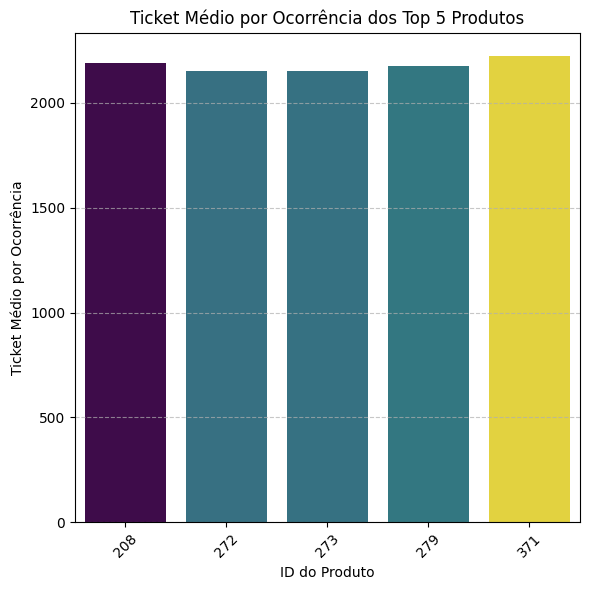

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x=ticket_medio_top_5.index, y=ticket_medio_top_5['Ticket Medio por Ocorrencia'], hue=ticket_medio_top_5.index, palette='viridis',legend=False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Ticket Médio por Ocorrência dos Top 5 Produtos')
plt.xlabel('ID do Produto')
plt.ylabel('Ticket Médio por Ocorrência')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Existe algum padrão de compra em relação a quantidade e preço dos produtos?

,quantity
product_id,
209,622.268287
384,619.207141
276,617.407935
238,600.446712
331,599.626609


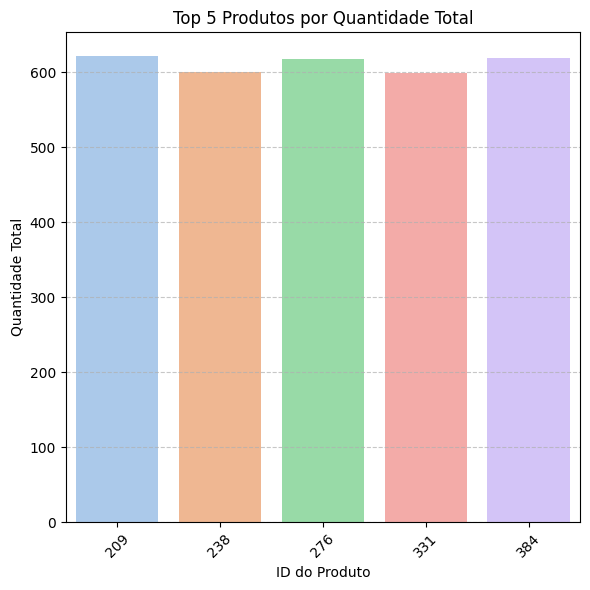

In [ ]:
#pegando os 5 produtos com maior quantidade de vendas
quantidade_por_produto =  vendas_df[['product_id','quantity']].groupby('product_id').sum().sort_values(by='quantity', ascending=False).head(5)
display(quantidade_por_produto)

plt.figure(figsize=(6, 6))
sns.barplot(x=quantidade_por_produto.index,          # Eixo X: ID do Produto
            y=quantidade_por_produto['quantity'],     # Eixo Y: Quantidade Total
            hue=quantidade_por_produto.index,         # Use o índice (IDs do produto) para o hue
            palette='pastel',
            legend=False)                             # Desabilite a legenda para evitar duplicação
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Top 5 Produtos por Quantidade Total')
plt.xlabel('ID do Produto')
plt.ylabel('Quantidade Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
quantidade_por_produto =  vendas_df[['product_id','quantity']].groupby('product_id').sum().sort_values(by='quantity', ascending=False).head(5)
lista_id = quantidade_por_produto.index.tolist()

df_top_5_produtos_filtrado = vendas_df[vendas_df['product_id'].isin(lista_id)]

#  todos os preços unitários encontrados para esses produtos
print("Todos os preços unitários das ocorrências dos Top 5 produtos (com duplicatas):")
display(df_top_5_produtos_filtrado[['product_id', 'price_y']])

#  preço unitário médio (se houver variação no preço do mesmo produto)
print("\nPreço Unitário Médio para cada um dos Top 5 Produtos:")
precos_medios = df_top_5_produtos_filtrado.groupby('product_id')['price_y'].mean().loc[lista_id]
display(precos_medios)

#  preços unitários únicos para cada um dos Top 5 produtos
print("\nPreços Unitários Únicos para cada um dos Top 5 Produtos:")
precos_unicos = df_top_5_produtos_filtrado.groupby('product_id')['price_y'].unique().loc[lista_id]
display(precos_unicos)

Todos os preços unitários das ocorrências dos Top 5 produtos (com duplicatas):


,product_id,price_y
2447,238,1459.38
2448,238,1459.38
2449,238,1459.38
2450,238,1459.38
2451,238,1459.38
...,...,...
39600,384,2934.18
39601,384,2934.18
39602,384,2934.18
39603,384,2934.18



Preço Unitário Médio para cada um dos Top 5 Produtos:


,price_y
product_id,
209,3154.820
384,2934.180
276,1026.110
238,1459.380
331,693.171



Preços Unitários Únicos para cada um dos Top 5 Produtos:


,price_y
product_id,
209,[3154.82]
384,[2934.18]
276,[1026.11]
238,[1459.38]
331,[693.171]


In [ ]:
produto_mais_baratos = vendas_df[['product_id','price_y']].groupby('product_id').min().sort_values(by='price_y', ascending=True).head(5)
print("Os 5 produtos mais baratos:")
display(produto_mais_baratos)
produto_mais_caros = vendas_df[['product_id','price_y']].groupby('product_id').max().sort_values(by='price_y', ascending=False).head(5)
print("Os 5 produtos mais caros:")
display(produto_mais_caros)
produtos_medianos = vendas_df[['product_id','price_y']].groupby('product_id').median().sort_values(by='price_y', ascending=False).head(5)
print("Os 5 produtos medianos:")
display(produtos_medianos)

Os 5 produtos mais baratos:


,price_y
product_id,
254,58.0000
366,86.7306
206,89.6952
334,93.7691
222,103.9120


Os 5 produtos mais caros:


,price_y
product_id,
252,3982.34
214,3917.66
213,3881.96
355,3874.47
385,3851.12


Os 5 produtos medianos:


,price_y
product_id,
252,3982.34
214,3917.66
213,3881.96
355,3874.47
385,3851.12


Avaliando os cinco produtos com mais volume de vendas, notamos que o valor influencia no volume de vendas, os produtos mais adquiridos estão entre produtos medio/baratos. Porem nenhum desses produtos esta entre os produtos mais que renderam mais receita, ou seja seu volume de venda não é suficiente para colocar um desses produtos, no Top 5 produtos com maior receita.

Conseguimos identificar clientes mais engajados (que compram com mais frequência ou gastam mais)?

Clientes que mais gastam.

,price_x
name,
Elwyn Koepp,51982.721
Prof. Hallie Heathcote DVM,45249.271
Mr. Shaun Pouros I,44898.917
Gloria Leannon,43820.187
Shirley Stanton,42263.183


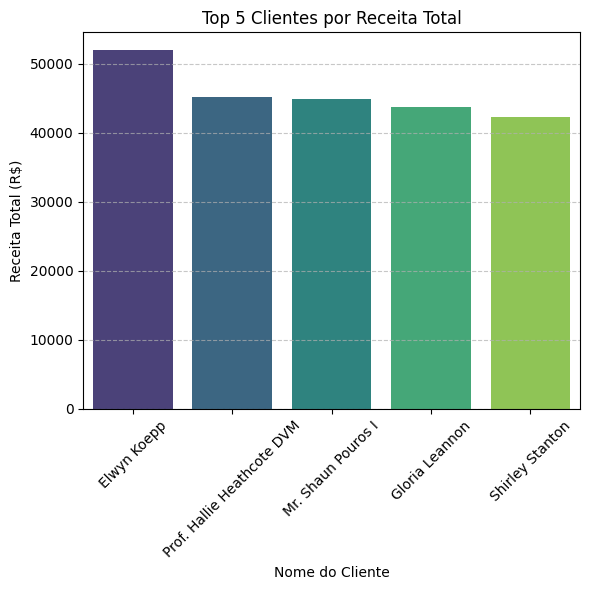

In [ ]:
cliente_mais_gastos = vendas_df[['name','price_x']].groupby('name').sum().sort_values(by='price_x', ascending=False).head(5)
display(cliente_mais_gastos)
plt.figure(figsize=(6, 6))
sns.barplot(x=cliente_mais_gastos.index, y=cliente_mais_gastos['price_x'],hue=cliente_mais_gastos.index, palette='viridis',legend=False)
plt.grid(axis='y', linestyle='--',alpha=0.7)
plt.title('Top 5 Clientes por Receita Total')
plt.xlabel('Nome do Cliente')
plt.ylabel('Receita Total (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
cliente_mais_gastos = vendas_df[['name','price_x']].groupby('name').sum().sort_values(by='price_x', ascending=False).head(5)
lista_de_nomes = cliente_mais_gastos.index.tolist()

df_top_5_clientes_filtrado = vendas_df[vendas_df['name'].isin(lista_de_nomes)]

primeira_ocorrencia_cliente = df_top_5_clientes_filtrado[['name','created_at']].groupby('name').min().sort_values(by='created_at', ascending=True)
ultima_ocorrencia_cliente = df_top_5_clientes_filtrado[['name','created_at']].groupby('name').max().sort_values(by='created_at', ascending=True)
print("Primeira Ocorrência de Cada Cliente:")
display(primeira_ocorrencia_cliente)
print("\nÚltima Ocorrência de Cada Cliente:")
display(ultima_ocorrencia_cliente)


Primeira Ocorrência de Cada Cliente:


,created_at
name,
Elwyn Koepp,1970-03-11 21:06:59+00:00
Shirley Stanton,1972-11-05 12:17:30+00:00
Mr. Shaun Pouros I,1981-03-22 04:44:31+00:00
Prof. Hallie Heathcote DVM,1981-05-05 21:11:41+00:00
Gloria Leannon,1982-06-19 10:16:27+00:00



Última Ocorrência de Cada Cliente:


,created_at
name,
Shirley Stanton,1982-03-17 18:48:42+00:00
Gloria Leannon,1987-12-26 11:42:43+00:00
Prof. Hallie Heathcote DVM,2011-12-21 10:29:09+00:00
Mr. Shaun Pouros I,2012-08-08 15:02:55+00:00
Elwyn Koepp,2017-10-24 06:37:03+00:00


Clientes com o maior volume de compra.

,quantity
name,
Ambrose Kautzer,63.583329
Ernesto Shields,58.248410
Elwyn Koepp,57.087300
Prof. Koby Herzog I,56.093870
Daphne Hudson,54.418320


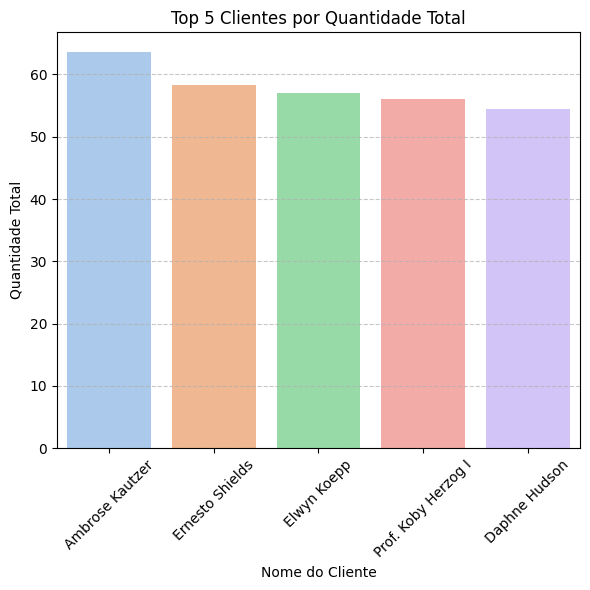

In [ ]:
clintes_mais_compras = vendas_df[['name','quantity']].groupby('name').sum().sort_values(by='quantity', ascending=False).head(5)
display(clintes_mais_compras)
plt.figure(figsize=(6, 6))
sns.barplot(x=clintes_mais_compras.index, y=clintes_mais_compras['quantity'], hue=clintes_mais_compras.index, palette='pastel', legend=False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Top 5 Clientes por Quantidade Total')
plt.xlabel('Nome do Cliente')
plt.ylabel('Quantidade Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
clintes_mais_compras = vendas_df[['name','quantity']].groupby('name').sum().sort_values(by='quantity', ascending=False).head(5)
lista_de_nomes = clintes_mais_compras.index.tolist()

df_top_5_clientes_filtrado = vendas_df[vendas_df['name'].isin(lista_de_nomes)]

primeira_ocorrencia_cliente = df_top_5_clientes_filtrado[['name','created_at']].groupby('name').min().sort_values(by='created_at', ascending=True)
ultima_ocorrencia_cliente = df_top_5_clientes_filtrado[['name','created_at']].groupby('name').max().sort_values(by='created_at', ascending=True)
print("Primeira Ocorrência de Cada Cliente:")
display(primeira_ocorrencia_cliente)
print("\nÚltima Ocorrência de Cada Cliente:")
display(ultima_ocorrencia_cliente)

Primeira Ocorrência de Cada Cliente:


,created_at
name,
Elwyn Koepp,1970-03-11 21:06:59+00:00
Ernesto Shields,1983-06-12 22:09:11+00:00
Ambrose Kautzer,1985-04-02 11:52:45+00:00
Daphne Hudson,2000-12-28 09:08:47+00:00
Prof. Koby Herzog I,2006-08-30 10:02:42+00:00



Última Ocorrência de Cada Cliente:


,created_at
name,
Ernesto Shields,1999-11-02 05:02:31+00:00
Prof. Koby Herzog I,2009-08-26 15:16:47+00:00
Ambrose Kautzer,2016-07-16 05:33:56+00:00
Daphne Hudson,2017-05-29 18:43:55+00:00
Elwyn Koepp,2017-10-24 06:37:03+00:00


In [ ]:
resumo_2020 = vendas_df[vendas_df['created_at'].dt.year == 2020]

meses_2020 = resumo_2020.groupby(resumo_2020['created_at'].dt.month)['quantity'].sum()
print("Quantidade de vendas por mês em 2020:")
display(meses_2020)

Quantidade de vendas por mês em 2020:


,quantity
created_at,
1,159.520709
2,28.175298


In [ ]:
ultimos_anos = vendas_df[vendas_df['created_at'].dt.year >= 2019]
nomes = ultimos_anos['name'].unique()
print('Número de clientes a partir de 2019')
display(len(nomes))
clientes_2019 = vendas_df[vendas_df['created_at'].dt.year == 2019]
nomes_2019 = clientes_2019['name'].unique()
clientes_2010 = vendas_df[vendas_df['created_at'].dt.year == 2010]
nomes_2010 = clientes_2010['name'].unique()
print('Clientes desde 2010')
lista_nomes_2010 = []
for nome in nomes_2019:
    if nome  in nomes_2010:
        lista_nomes_2010.append(nome)
        print(nome)



Número de clientes a partir de 2019


226

Clientes desde 2010
Prof. Jannie Blick
Penelope Towne
Grayce Skiles
Juana Runolfsson
Ruben Waelchi
Mrs. Yoshiko Medhurst
Hillary Homenick
Dr. Seth Bogisich DVM


In [ ]:
clientes_filtrado = vendas_df[vendas_df['name'].isin(lista_nomes_2010)]
quantidade_por_cliente = clientes_filtrado[['name','quantity']].groupby('name').sum().sort_values(by='quantity', ascending=False)
display(quantidade_por_cliente)
clientes_receitas = clientes_filtrado[['name','price_x']].groupby('name').sum().sort_values(by='price_x', ascending=False)
display(clientes_receitas)

,quantity
name,
Dr. Seth Bogisich DVM,40.025250
Penelope Towne,32.013408
Hillary Homenick,28.073624
Ruben Waelchi,24.940480
Prof. Jannie Blick,22.410450
Juana Runolfsson,20.519130
Grayce Skiles,18.852136
Mrs. Yoshiko Medhurst,18.466271


,price_x
name,
Dr. Seth Bogisich DVM,30963.642
Hillary Homenick,23933.540
Grayce Skiles,21659.727
Prof. Jannie Blick,20861.650
Ruben Waelchi,20137.962
Penelope Towne,19432.968
Mrs. Yoshiko Medhurst,18596.813
Juana Runolfsson,17930.200


Vendas por mês total (ao longo dos anos)

Quantidade de vendas por mês:


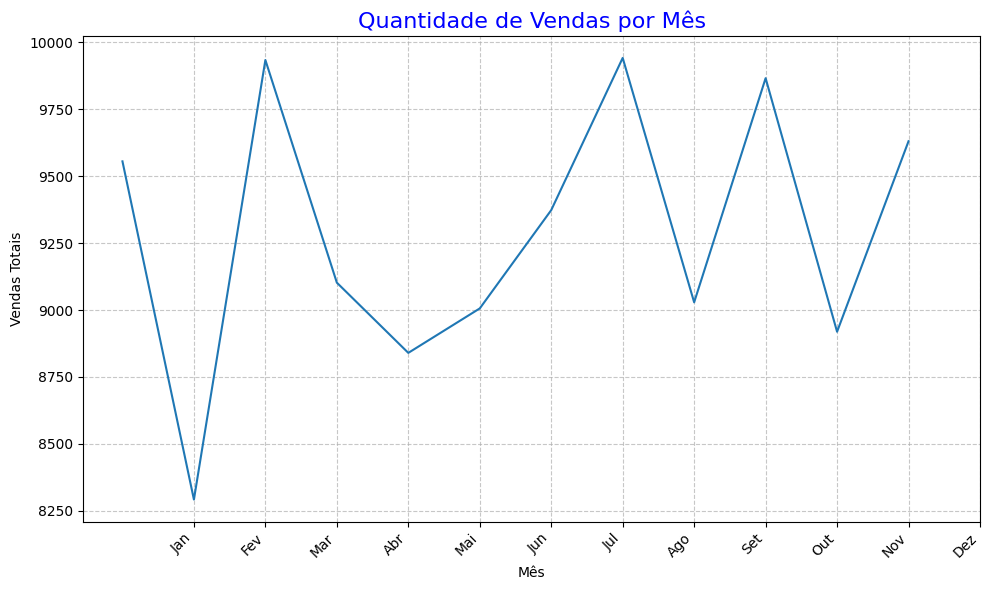

In [ ]:
vendas_por_mes = vendas_df.groupby(vendas_df['created_at'].dt.month)['quantity'].sum()
print("Quantidade de vendas por mês:")
plt.figure(figsize=(10, 6))
sns.lineplot(x=vendas_por_mes.index.astype(str), y=vendas_por_mes.values)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Quantidade de Vendas por Mês', fontsize=16, color='blue', loc='center')
plt.xlabel('Mês')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=45, ha='right') # Gira os rótulos do eixo x para melhor visibilidade se houver muitos meses
plt.xticks(range(1, 13), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']) # Melhora os rótulos do eixo X
plt.tight_layout() # Ajusta o layout para evitar que os rótulos se sobreponham
plt.show()

In [ ]:
anos_agrupados = vendas_df.groupby(vendas_df['created_at'].dt.year)['quantity'].sum()

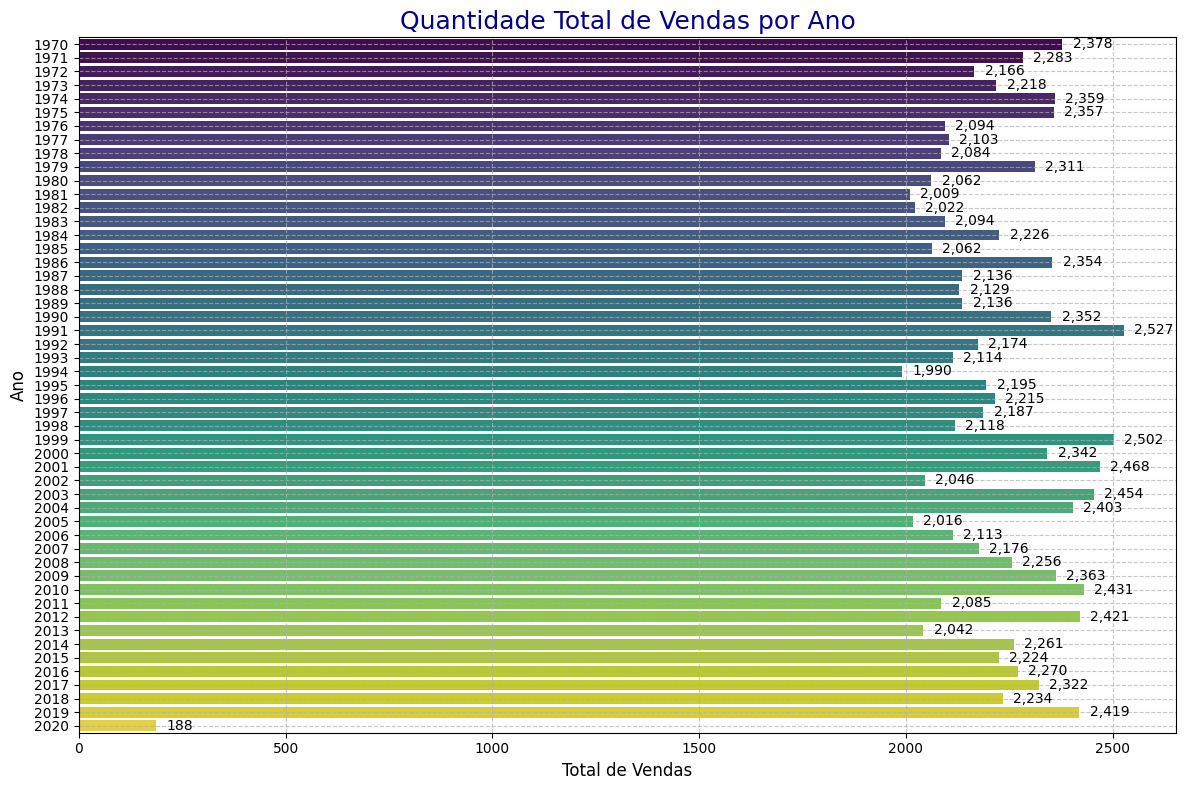

In [ ]:
plt.figure(figsize=(12, 8)) # Definir o tamanho da figura (um pouco mais largo para as barras horizontais)


# Agora, 'y' recebe os anos e 'x' recebe as quantidades
sns.barplot(x=anos_agrupados.values,  # Os valores (quantidade) no eixo X (horizontal)
            y=anos_agrupados.index,   # Os anos no eixo Y (vertical)
            orient='h',hue=anos_agrupados.index,               # Explicitamente define a orientação como horizontal
            palette='viridis',legend=False)        # Uma paleta de cores agradável

# Adiciona título e rótulos
plt.title('Quantidade Total de Vendas por Ano', fontsize=18, color='darkblue', loc='center')
plt.xlabel('Total de Vendas', fontsize=12) # Rótulo do eixo X para as vendas
plt.ylabel('Ano', fontsize=12)             # Rótulo do eixo Y para os anos

# Adiciona os valores ao lado de cada barra para melhor leitura
for index, value in enumerate(anos_agrupados.values):
    plt.text(value + (anos_agrupados.max() * 0.01), # Posição à direita da barra
             index,                                  # Na altura da barra (índice do ano)
             f'{value:,.0f}',                        # Formata o valor sem casas decimais e com separador de milhar
             ha='left', va='center', fontsize=10)    # Alinhamento do texto

plt.grid(True, linestyle='--', alpha=0.7) # Adiciona um grid horizontal
plt.tight_layout() # Ajusta o layout para evitar cortes
plt.show()

,quantity
created_at,
Friday,15598.957588
Monday,15710.058644
Saturday,15605.245618
Sunday,16333.076394
Thursday,15329.185679
Tuesday,16107.588747
Wednesday,16804.383159


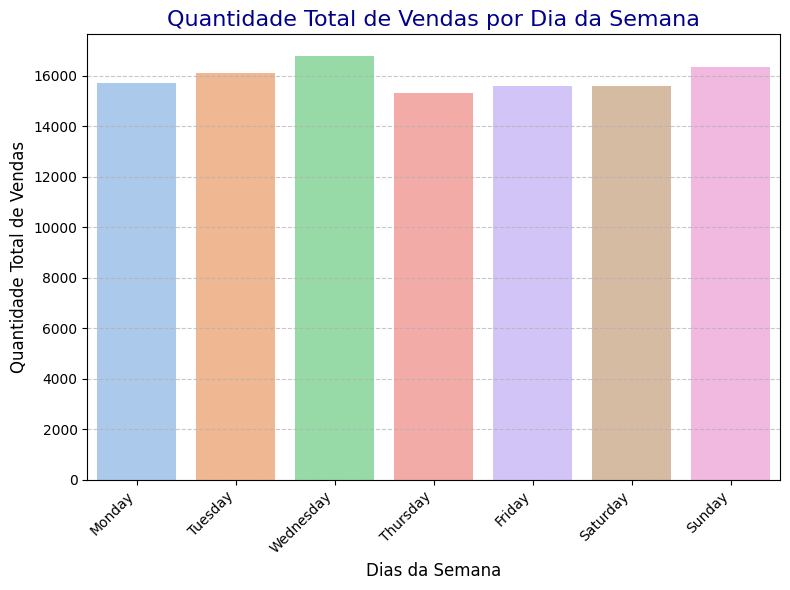

In [ ]:
dias_agrupados = vendas_df.groupby(vendas_df['created_at'].dt.day_name())['quantity'].sum()
display(dias_agrupados)

# Definir a ordem desejada dos dias da semana (em inglês, pois dt.day_name() retorna em inglês por padrão)
# Se você quiser em português, precisaria de um mapeamento ou definir o locale do pandas.
ordem_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Reindexar a Series para garantir a ordem correta no gráfico
dias_agrupados = dias_agrupados.reindex(ordem_dias)
plt.figure(figsize=(8, 6))

#  Acessar index e values diretamente da Series ---
sns.barplot(x=dias_agrupados.index, # O índice são os nomes dos dias
            y=dias_agrupados.values, # Os valores são as quantidades somadas
            palette='pastel',hue=dias_agrupados.index,
            legend=False) # Não precisa de legenda se o 'hue' não está sendo usado como principal categorização

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Quantidade Total de Vendas por Dia da Semana', fontsize=16, color='darkblue') # Título mais completo
plt.xlabel('Dias da Semana', fontsize=12)
plt.ylabel('Quantidade Total de Vendas', fontsize=12) # Rótulo do eixo Y mais descritivo
plt.xticks(rotation=45, ha='right') # Rotaciona para melhor leitura e alinha à direita
plt.tight_layout()
plt.show()

Ao longo dos anos mostrou uma tendencia de aumento nas vendas nos seguinte meses fevereiro, julho, setembro e novembro e diariamente as vendas se manteve acima de 14000 com pico maximo na quarta-feira 16804.

Nosso objetivo é usar essas informações para personalizar ofertas, melhorar a gestão de estoque e, claro, aumentar nossas vendas. Você pode nos ajudar com isso?

Personalização de Ofertas.

Gestão de Estoque.

Aumento de vendas.